In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('data/fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


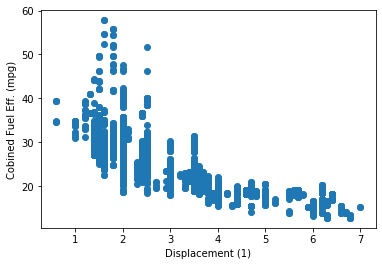

In [4]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Cobined Fuel Eff. (mpg)');

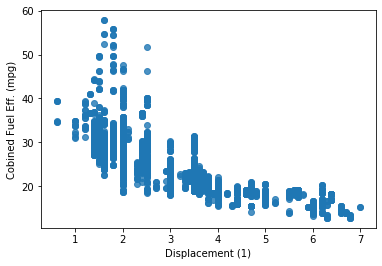

In [6]:
#  Seaborn scatter plots
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Cobined Fuel Eff. (mpg)');

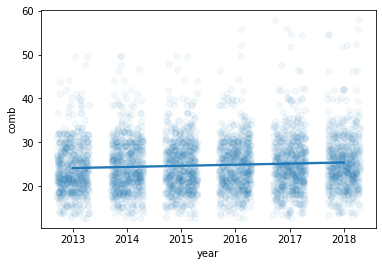

In [14]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb',x_jitter = 0.3, scatter_kws = {'alpha':1/20});

# Heat Map or 2D Histogram

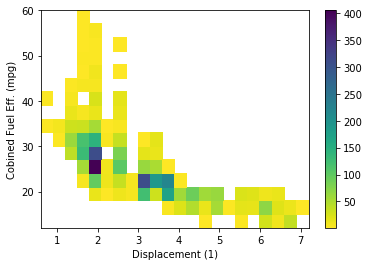

In [20]:
bins_x = np.arange(0.6, 7+0.3,0.3)
bins_y = np.arange(12,58+3,3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r',bins = [bins_x,bins_y]);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Cobined Fuel Eff. (mpg)');

In [19]:
fuel_econ[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


# Violin Plot

In [22]:
sedan_classes = {'Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars'}
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

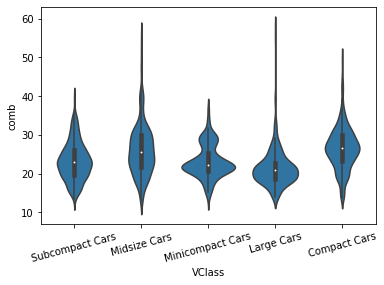

In [28]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x ='VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);